<a href="https://colab.research.google.com/github/shannonfernandes25/bioinformatics-BPRI-Bioinformatics/blob/main/Machine_learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification (Predicting Categories)

Example 1: Predicting Tumor Type (Benign vs Malignant)

Dataset: Breast Cancer Dataset (built into scikit-learn)

Algorithm: Logistic Regression, Random Forest Classifier

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

#Evaluation
print("Logistic Regression:\n ",classification_report(y_test, log_pred))

Logistic Regression:
                precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#Evaluation
print("Random Forest:\n ", classification_report(y_test, rf_pred))

Random Forest:
                precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
! pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.0 MB/s eta 0:00:00


In [2]:
from Bio.PDB import PDBParser

parser = PDBParser()
structure = parser.get_structure("9im4","/content/9IM4.pdb")
for model in structure:
  for chain in model:
    print(chain.id)

A
P
B
C


/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2925.
  warnings.warn(


In [3]:
! pip install transformers

In [4]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Whenever we are converting the datatype, the simple reason is that, the used datatype is not compatible with the library or module which we are using.

In [5]:
sequence_A = " ".join(list('''MGSSHHHHHHSSGLVPRGSHMASSCAVQVKLELGHRAQVRKKPTVEGRTHDWMVFVRGPEHSNIQHFVEK
VVFHLHESFPRPKRVCKDPPYKVEESGYAGFILPIEVYFKNKEEPRKVRFDYDLFLHLEGHPPVNHLRCE
KLTFNNPTEDFRRKLLKA'''))

In [6]:
sequence_B = " ".join(list('''MGSSHHHHHHSSGLVPRGSHMASSCAVQVKLELGHRAQVRKKPTVEGRTHDWMVFVRGPEHSNIQHFVEK
VVFHLHESFPRPKRVCKDPPYKVEESGYAGFILPIEVYFKNKEEPRKVRFDYDLFLHLEGHPPVNHLRCE
KLTFNNPTEDFRRKLLKA'''))

In [7]:
sequence_P = " ".join(list('''ARTKQTARXS'''))

In [8]:
sequence_C = " ".join(list('''ARTKQTARXS'''))

In [9]:
! pip install torch scikit-learn shap seaborn matplotlib

# SHAP (SHapley Additive exPlanations) is used here to interpret the model's predictions.
# It helps quantify how much each feature contributes to a specific prediction,
# allowing us to understand and visualize model behavior in a transparent way.

In [10]:
from Bio import PDB
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import seq1

# Parse PDB and extract sequence
def extract_sequence(pdb_file):
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)
    seq = ''
    for model in structure:
        for chain in model:
            for residue in chain:
                if PDB.is_aa(residue, standard=True):
                    seq += seq1(residue.get_resname())
    return seq

# used case
sequence = extract_sequence('9IM4.pdb')
print(f"Extracted Sequence: {sequence[:60]}... Total Length: {len(sequence)}")


Extracted Sequence: RGSHMASSCAVQVKLELGHRAQVRKKPTVEGRTHDWMVFVRGPEHSNIQHFVEKVVFHLH... Total Length: 294


/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2925.
  warnings.warn(


In [11]:
from transformers import BertModel, BertTokenizer
import torch
import numpy as np

# Load ProtBERT
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Prepare sequence
sequence = ' '.join(list(sequence))
encoded_input = tokenizer(sequence, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    output = model(**encoded_input)

# Get embeddings for each residue (remove special tokens)
embeddings = output.last_hidden_state.squeeze(0)[1:-1].numpy()  # Shape: (L x 1024)

print("Embeddings shape:", embeddings.shape)


Embeddings shape: (294, 1024)


In [12]:
# Prepare sequence
sequence_A = ' '.join(list(sequence_A))
encoded_input_A = tokenizer(sequence_A, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    output_A = model(**encoded_input_A)

# Get embeddings for each residue (remove special tokens)
embeddings_A = output_A.last_hidden_state.squeeze(0)[1:-1].numpy()  # Shape: (L x 1024)

print("Embeddings shape:", embeddings_A.shape)

Embeddings shape: (158, 1024)


In [13]:
# Prepare sequence
sequence_B = ' '.join(list(sequence_B))
encoded_input_B = tokenizer(sequence_B, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    output_B = model(**encoded_input_B)

# Get embeddings for each residue (remove special tokens)
embeddings_B = output_B.last_hidden_state.squeeze(0)[1:-1].numpy()  # Shape: (L x 1024)

print("Embeddings shape:", embeddings_B.shape)

Embeddings shape: (158, 1024)


In [14]:
# Prepare sequence
sequence_P = ' '.join(list(sequence_P))
encoded_input_P = tokenizer(sequence_P, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    output_P = model(**encoded_input_P)

# Get embeddings for each residue (remove special tokens)
embeddings_P = output_P.last_hidden_state.squeeze(0)[1:-1].numpy()  # Shape: (L x 1024)

print("Embeddings shape:", embeddings_P.shape)

Embeddings shape: (10, 1024)


In [15]:
# Prepare sequence
sequence_C = ' '.join(list(sequence_C))
encoded_input_C = tokenizer(sequence_C, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    output_C = model(**encoded_input_C)

# Get embeddings for each residue (remove special tokens)
embeddings_C = output_C.last_hidden_state.squeeze(0)[1:-1].numpy()  # Shape: (L x 1024)

print("Embeddings shape:", embeddings_C.shape)

Embeddings shape: (10, 1024)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


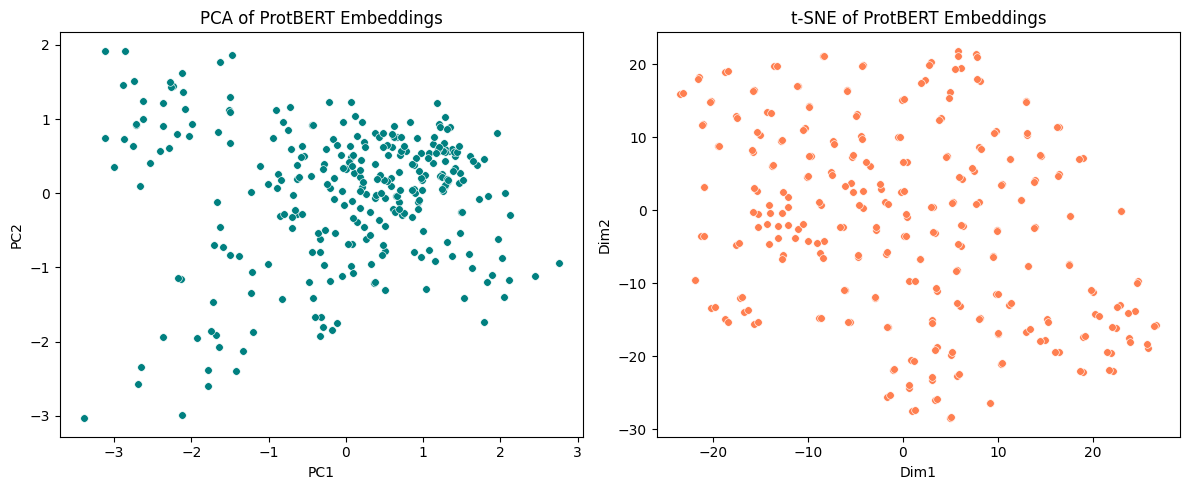

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], s=30, color="teal")
plt.title("PCA of ProtBERT Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], s=30, color="coral")
plt.title("t-SNE of ProtBERT Embeddings")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


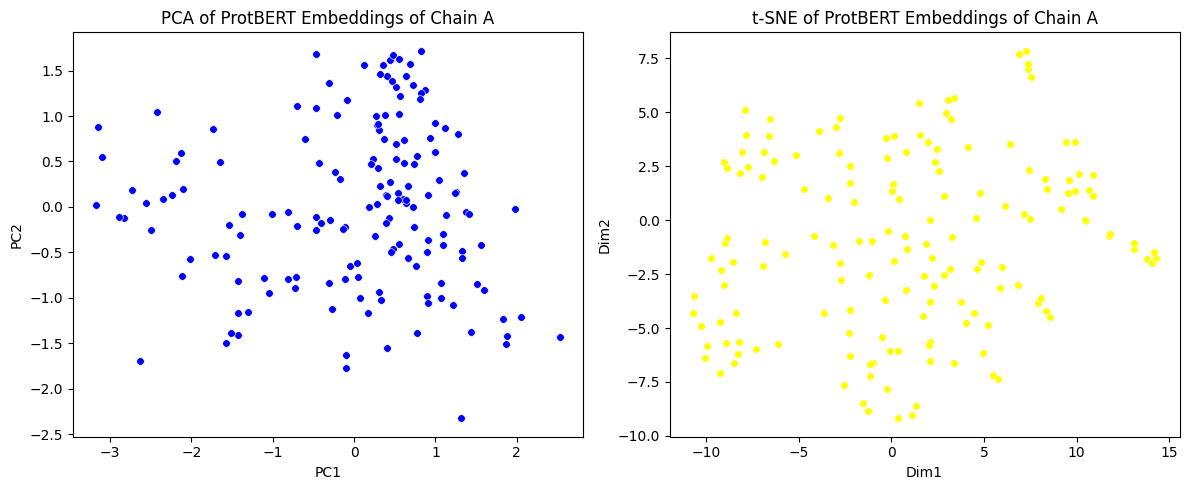

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_A)

# t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings_A)

# Plotting
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], s=30, color="blue")
plt.title("PCA of ProtBERT Embeddings of Chain A")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], s=30, color="yellow")
plt.title("t-SNE of ProtBERT Embeddings of Chain A")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


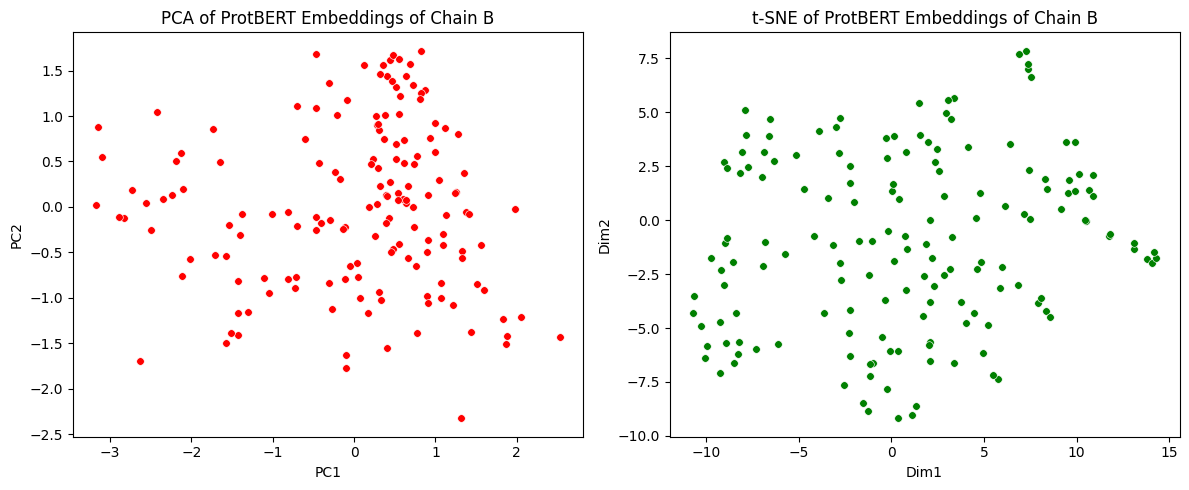

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_B)

# t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings_B)

# Plotting
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], s=30, color="red")
plt.title("PCA of ProtBERT Embeddings of Chain B")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], s=30, color="green")
plt.title("t-SNE of ProtBERT Embeddings of Chain B")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


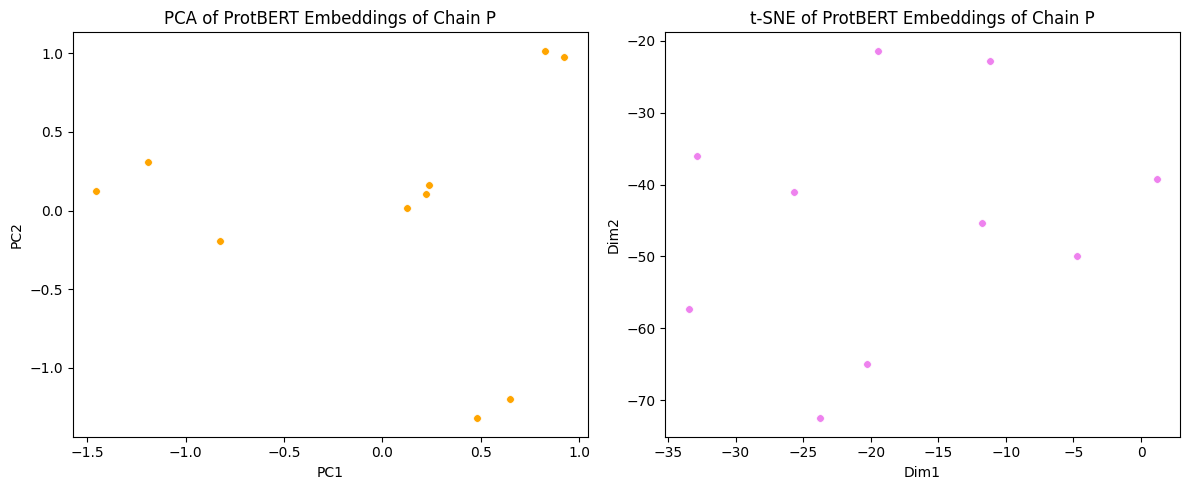

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_P)

# t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings_P)

# Plotting
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], s=30, color="orange")
plt.title("PCA of ProtBERT Embeddings of Chain P")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], s=30, color="violet")
plt.title("t-SNE of ProtBERT Embeddings of Chain P")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


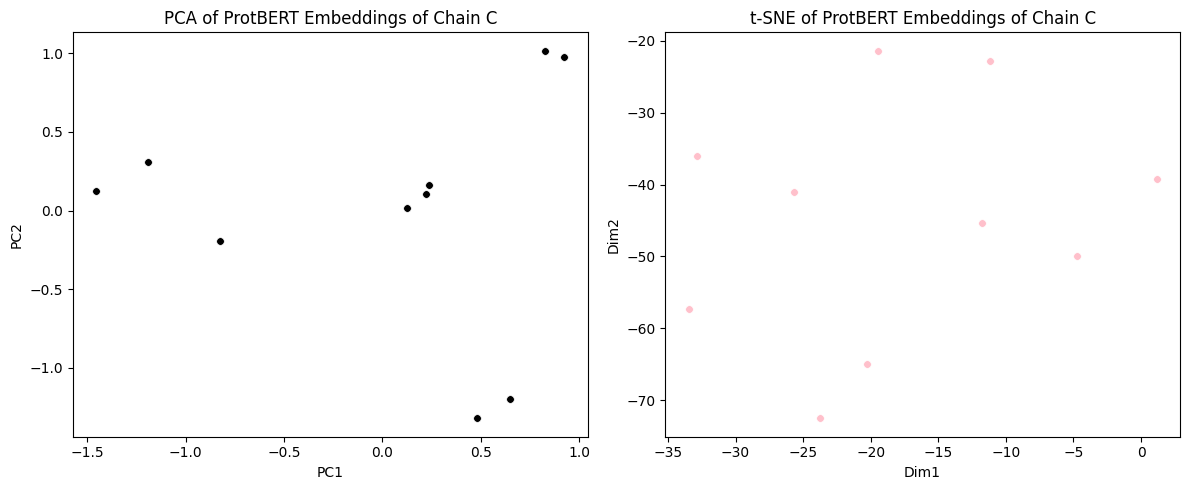

In [28]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_C)

# t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(embeddings_C)

# Plotting
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], s=30, color="black")
plt.title("PCA of ProtBERT Embeddings of Chain C")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE
plt.subplot(1,2,2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], s=30, color="pink")
plt.title("t-SNE of ProtBERT Embeddings of Chain C")
plt.xlabel("Dim1")
plt.ylabel("Dim2")

plt.tight_layout()
plt.show()

In [21]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


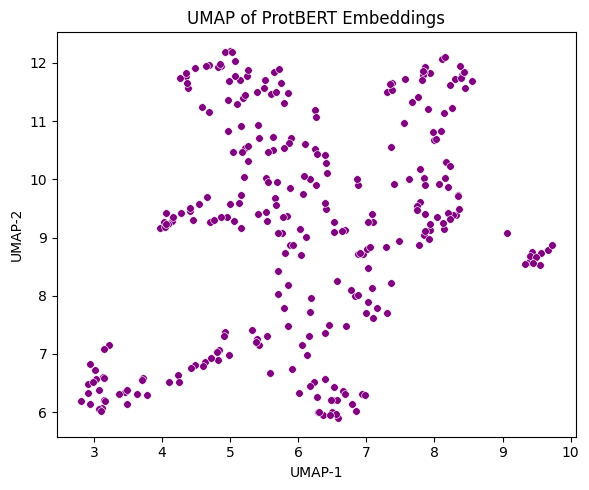

In [22]:
import umap

# UMAP to 2D
umap_reducer = umap.UMAP(n_components = 2, random_state=42)
umap_result = umap_reducer.fit_transform(embeddings)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], s=30, color="purple")
plt.title("UMAP of ProtBERT Embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


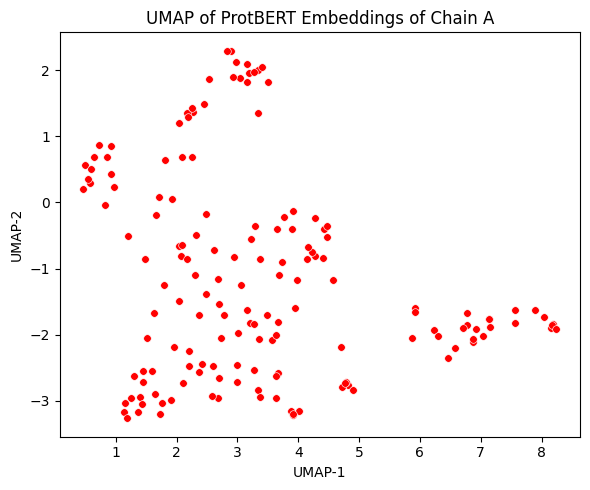

In [23]:
import umap

# UMAP to 2D
umap_reducer = umap.UMAP(n_components = 2, random_state=42)
umap_result = umap_reducer.fit_transform(embeddings_A)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], s=30, color="red")
plt.title("UMAP of ProtBERT Embeddings of Chain A")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


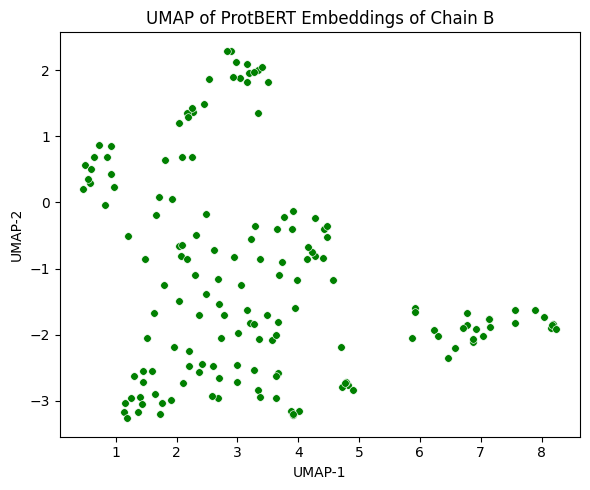

In [24]:
import umap

# UMAP to 2D
umap_reducer = umap.UMAP(n_components = 2, random_state=42)
umap_result = umap_reducer.fit_transform(embeddings_B)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], s=30, color="green")
plt.title("UMAP of ProtBERT Embeddings of Chain B")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


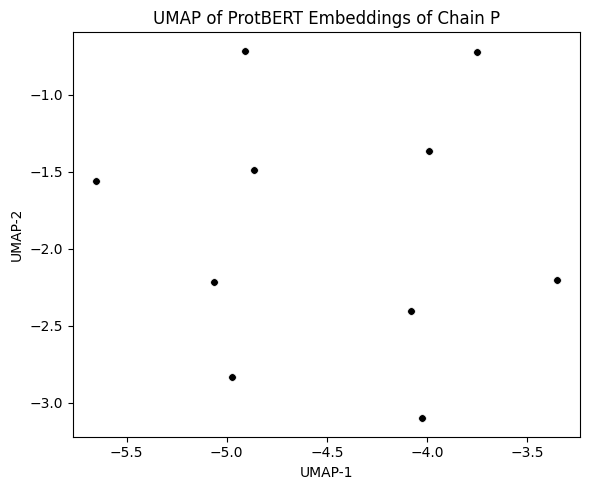

In [25]:
import umap

# UMAP to 2D
umap_reducer = umap.UMAP(n_components = 2, random_state=42)
umap_result = umap_reducer.fit_transform(embeddings_P)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], s=30, color="black")
plt.title("UMAP of ProtBERT Embeddings of Chain P")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


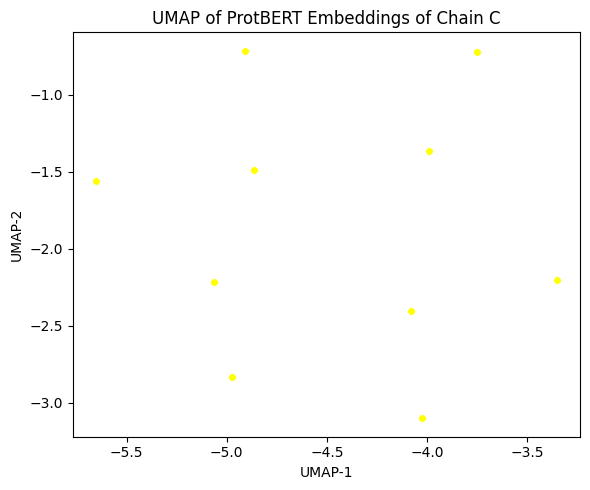

In [26]:
import umap

# UMAP to 2D
umap_reducer = umap.UMAP(n_components = 2, random_state=42)
umap_result = umap_reducer.fit_transform(embeddings_C)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], s=30, color="yellow")
plt.title("UMAP of ProtBERT Embeddings of Chain C")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

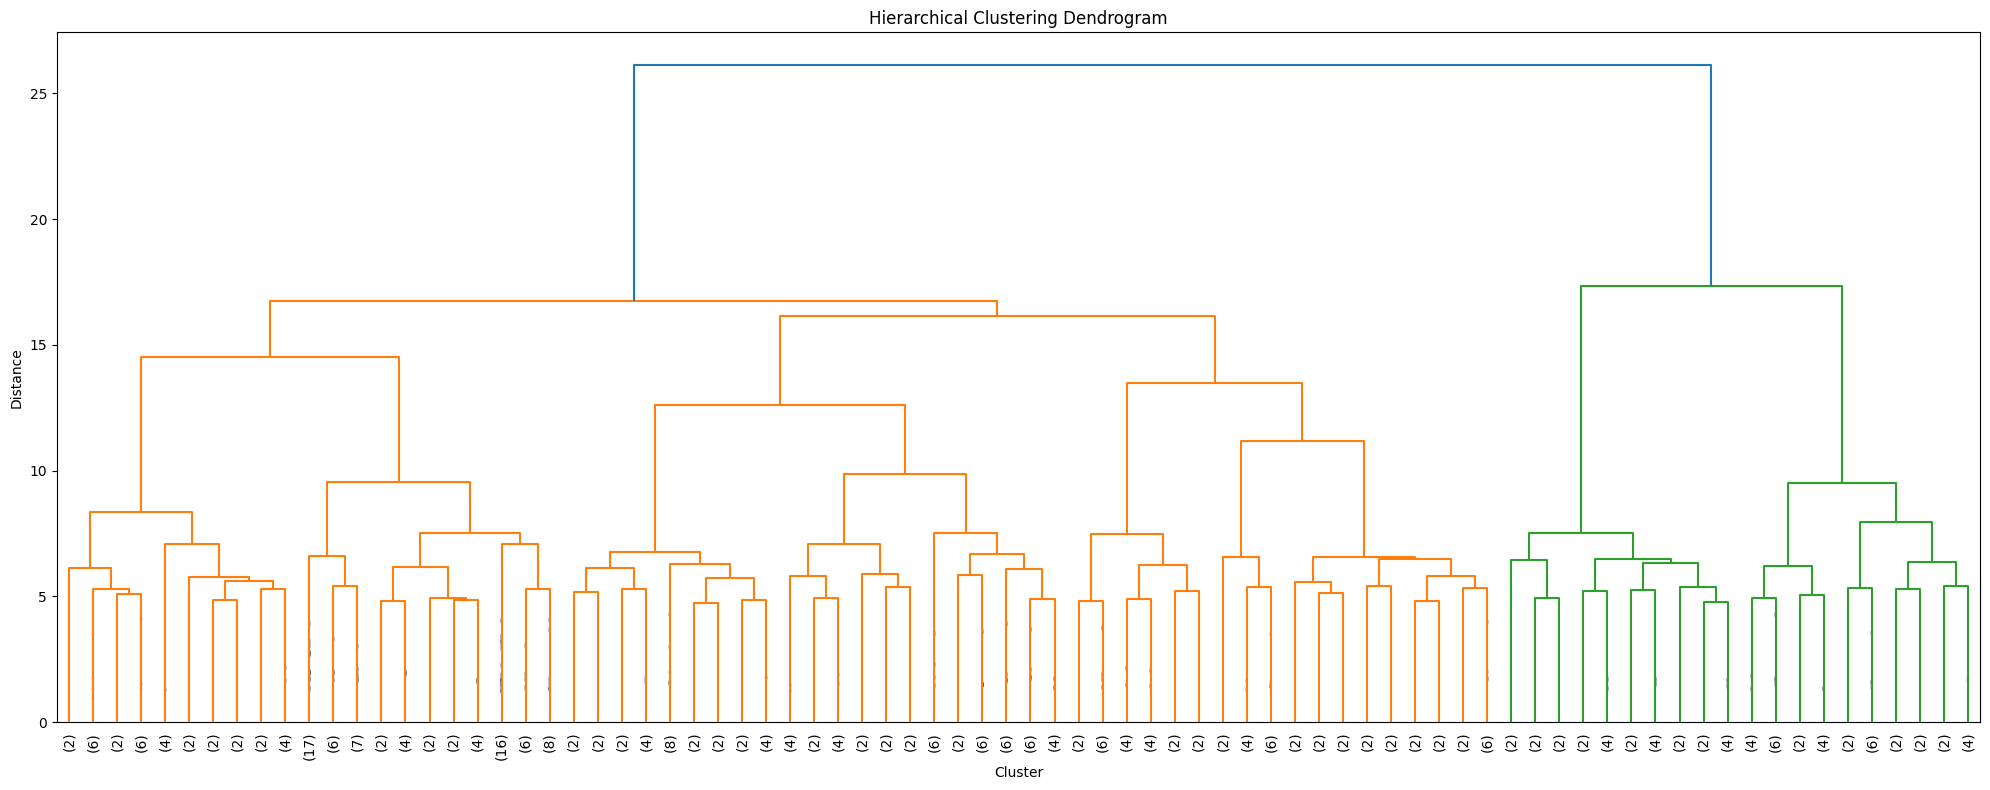

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage
linked = linkage(embeddings, method='ward')

# Plot dendrogram
plt.figure(figsize=(20,8))
dendrogram(linked, truncate_mode="lastp", p=80, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

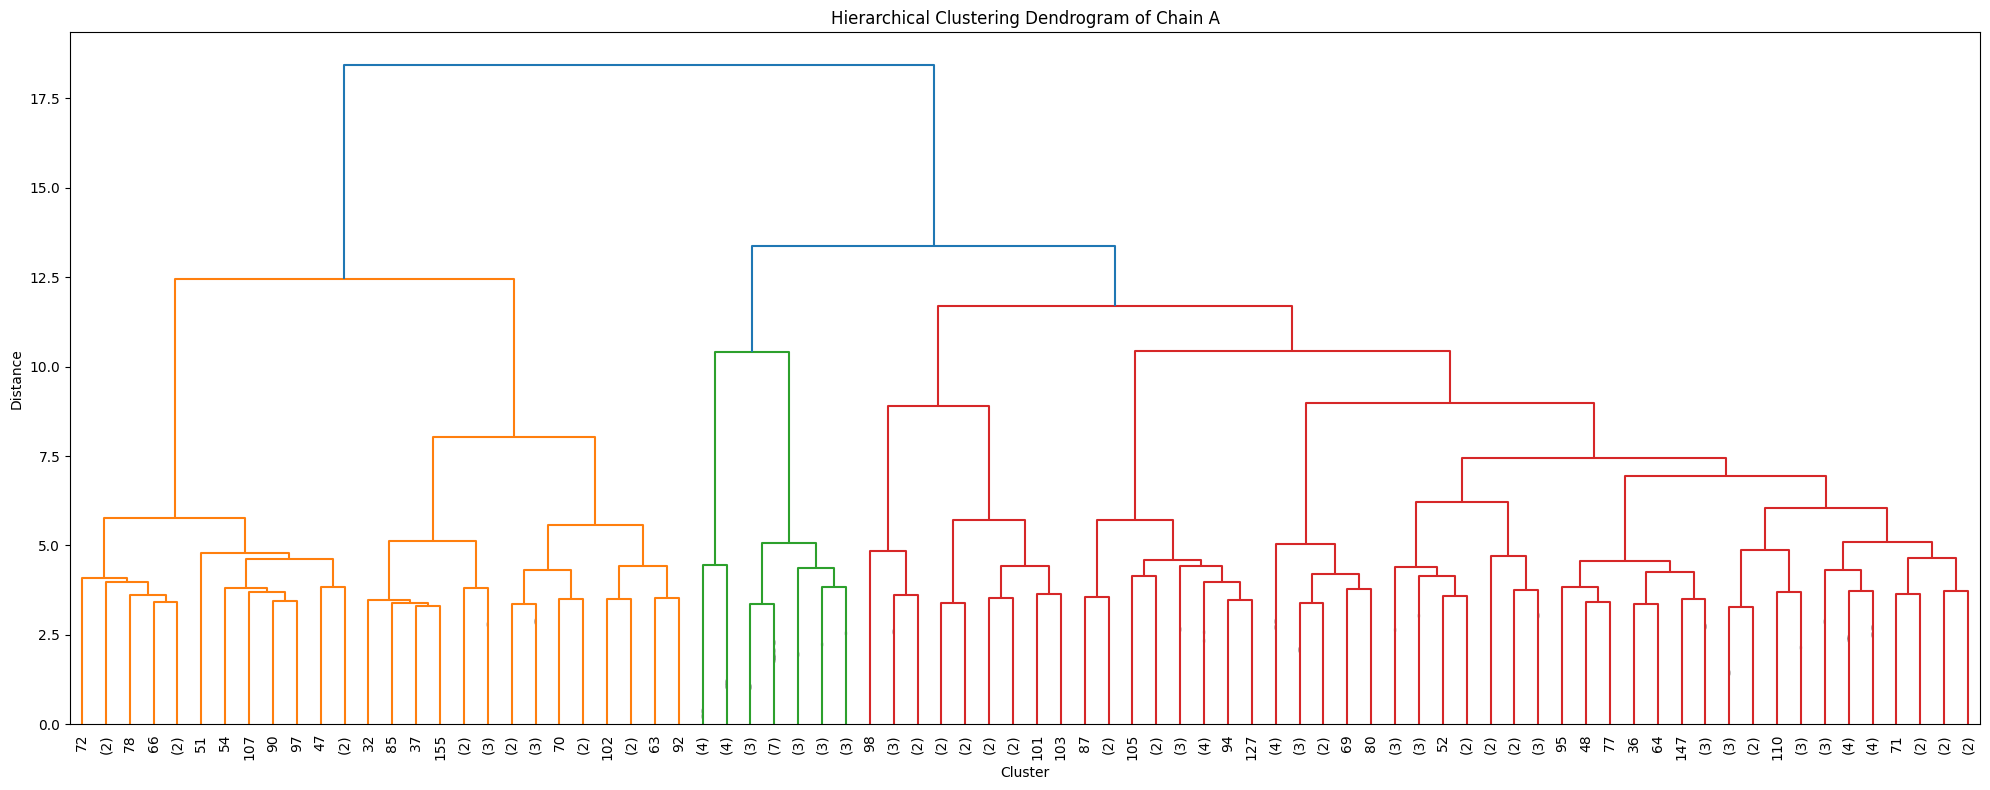

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage
linked = linkage(embeddings_A, method='ward')  # Ward's method merges clusters to minimize the total within-cluster variance

# Plot dendrogram
plt.figure(figsize=(20,8))
dendrogram(
    linked,                # The hierarchical clustering linkage matrix from 'linkage()'
    truncate_mode="lastp", # Show only the last p merged clusters (useful for large datasets)
    p=80,                  # If truncate_mode="lastp", display only the last 80 clusters
    leaf_rotation=90,      # Rotate the leaf (x-axis) labels by 90 degrees for better readability
    leaf_font_size=10,     # Set font size of the leaf labels to 10
    show_contracted=True   # Show summary nodes (triangles) for merged clusters not shown due to truncation
)
plt.title("Hierarchical Clustering Dendrogram of Chain A")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

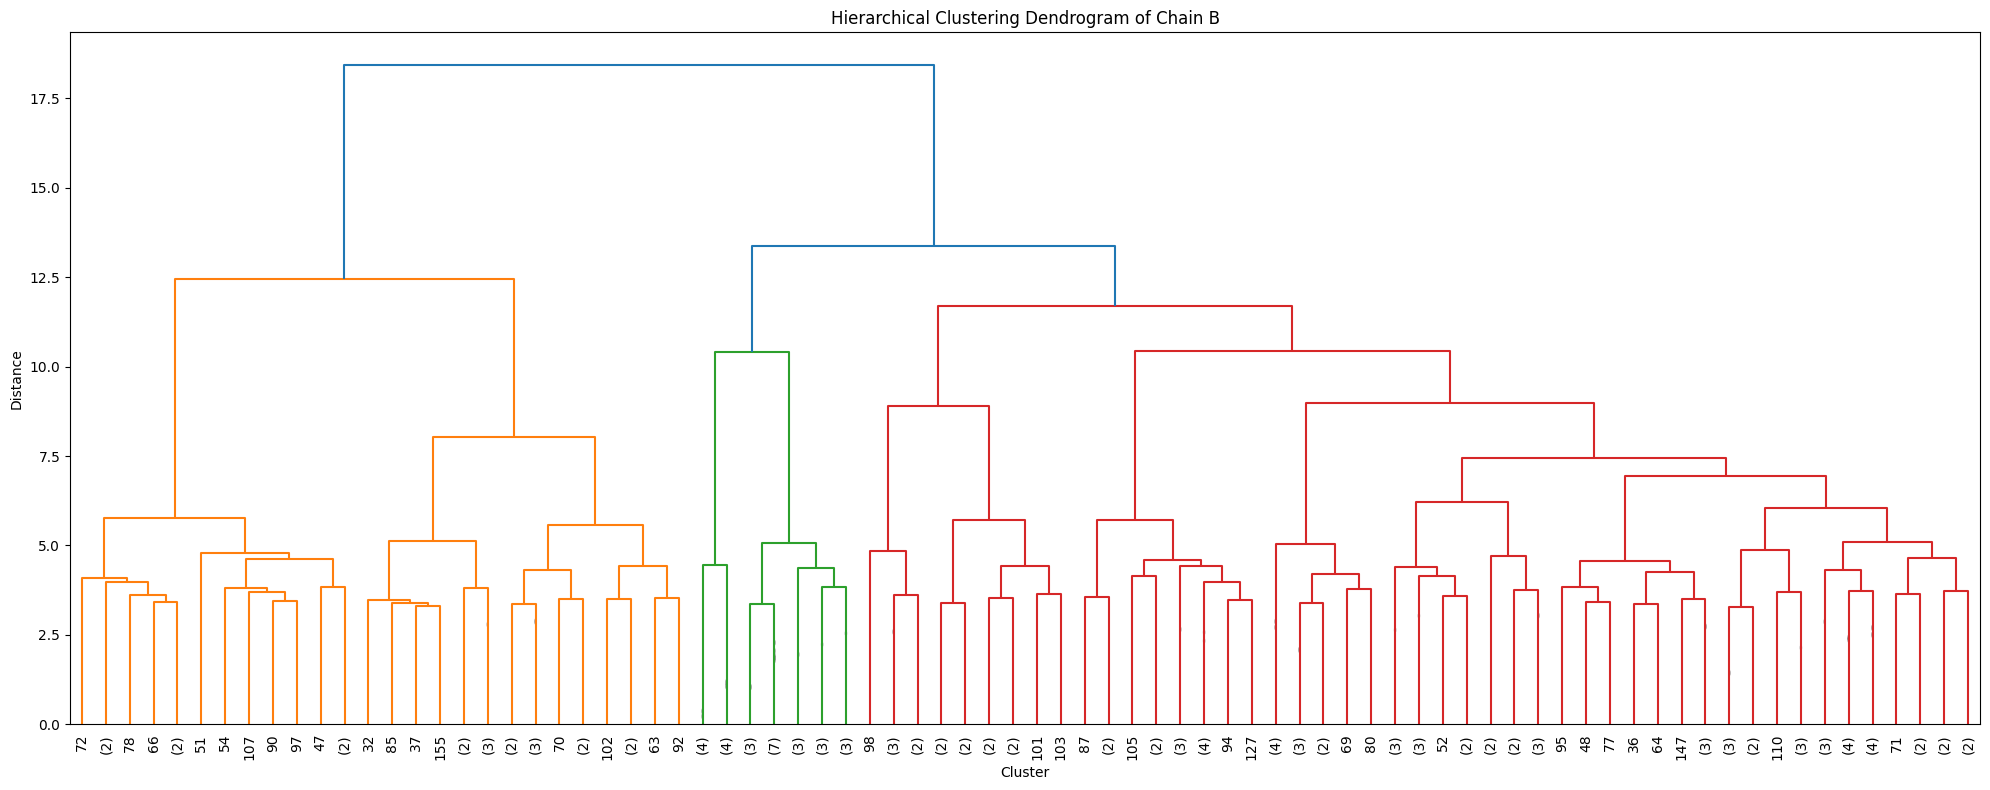

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage
linked = linkage(embeddings_B, method='ward')

# Plot dendrogram
plt.figure(figsize=(20,8))
dendrogram(linked, truncate_mode="lastp", p=80, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram of Chain B")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

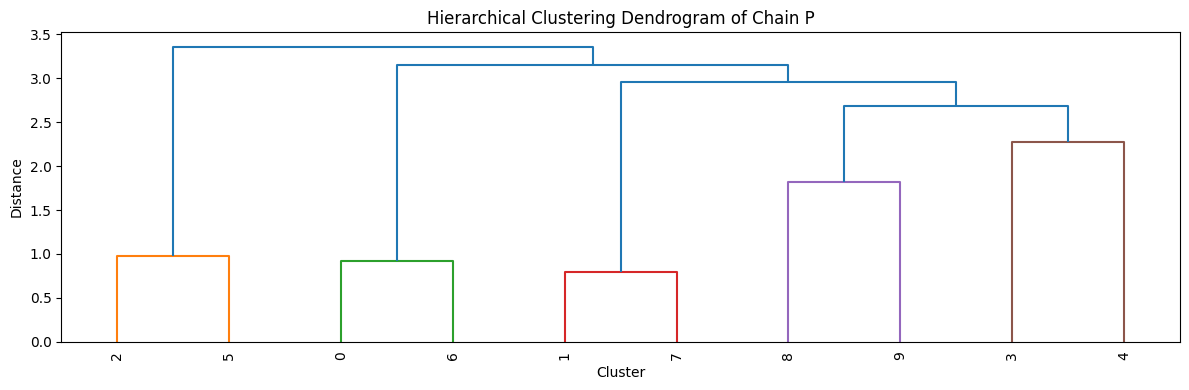

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage
linked = linkage(embeddings_P, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,4))
dendrogram(linked, truncate_mode="lastp", p=80, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram of Chain P")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

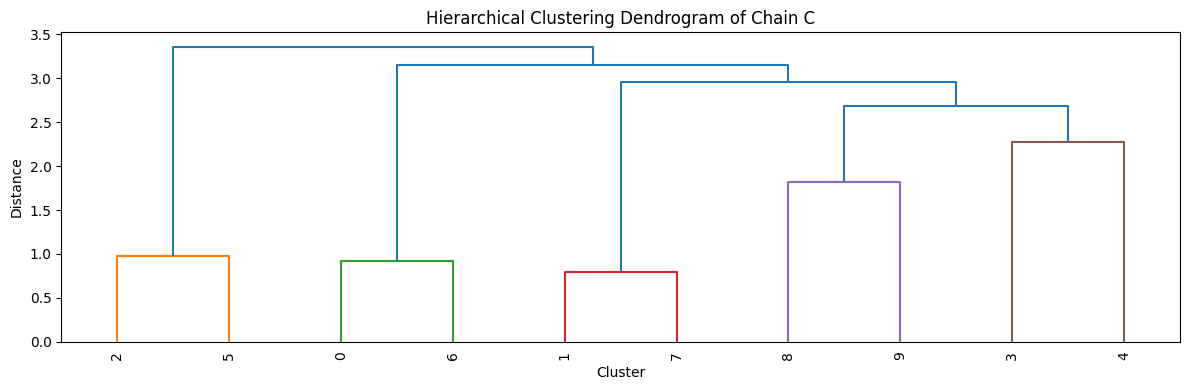

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage
linked = linkage(embeddings_C, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,4))
dendrogram(linked, truncate_mode="lastp", p=80, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram of Chain C")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()